In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data files/Bank.csv")
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
x=data.iloc[:,:7]
y=data.iloc[:,7]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
model=LogisticRegression()

In [10]:
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
model.intercept_

array([0.00389663])

In [12]:
model.coef_

array([[ 0.0010299 ,  0.00453543, -0.21667235,  0.42441232,  0.0562328 ,
        -0.27695657, -0.0078621 ]])

In [14]:
y_pred=model.predict(x_test)

In [15]:
y_pred_probs=model.predict_proba(x_test)

In [16]:
y_pred_probs

array([[0.93743943, 0.06256057],
       [0.67198446, 0.32801554],
       [0.99149553, 0.00850447],
       ...,
       [0.99216228, 0.00783772],
       [0.94365435, 0.05634565],
       [0.99442538, 0.00557462]])

In [17]:
confusion_matrix(y_test,y_pred)

array([[7157,  168],
       [ 606,  307]])

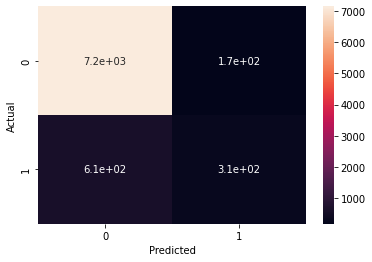

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [21]:
tn

7157

In [22]:
tp

307

In [23]:
fn

606

In [24]:
fp

168

In [25]:
accuracy_score(y_test,y_pred)

0.9060451565914057

In [27]:
np.diag(confusion_matrix(y_test,y_pred)).sum()/len(y_test)

0.9060451565914057

In [28]:
1-accuracy_score(y_test,y_pred)

0.09395484340859428

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7325
           1       0.65      0.34      0.44       913

    accuracy                           0.91      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



In [32]:
data["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [34]:
fpr,tpr,_=roc_curve(y_test,y_pred_probs[:,1])

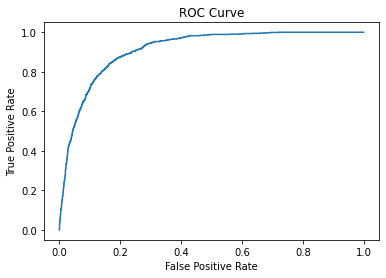

In [35]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [40]:
roc_auc_score(y_test,y_pred_probs[:,1])

0.9121243023599207